<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/RO/cvicenia/notebooky/cv08_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8 - kNN, Hyperparameter selection, Evaluation

In this lab we will cover the k nearest neighbors classifier, hyperparameter tuning and evaluation.

## kNN

First we will work with kNN. For now we will use the sklearn library and use `sklearn.neighbors.KNeighborsClassifier`. In the last (bonus) exercise you can implement your own version kNN.

We will now work with the Fisher Iris database. Below is the standard code for this task. We will use StandardScaler in a pipeline as that is an important step for kNN.

In [ ]:
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456789)

knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3, metric='euclidean'))
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", np.sum(y_pred == y_test)/ len(y_pred))

Accuracy:  0.9444444444444444


### Exercise - Validation

Now we will try to find optimal k and metric to use with out data. First we will again split the training set to a proper training set and a validation set. We will then try various values of k and various metrics fitted on the training data. We will then calculate the accuracy on the validation set. The combination that acieved the best results on the validation set can then be used. Finally, we will evaluate the values on test set.

You should try various values of k (`n_neighbors`) and also various metrics. You can find the information on metrics in [this part of the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric). Alternatively, you can just get a list of usable metrics by calling `sorted(sklearn.neighbors.VALID_METRICS['brute'])`

*Note:* Some metrics also have additional keywords. You can check them out in the docimentation, but you can also 



In [ ]:
# you can try this on various datsets
data = datasets.load_breast_cancer()
# data = datasets.load_iris()
# data = datasets.load_wine()

X = data.data
y = data.target

# you can see how the results may change a bit if we change the random state
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=11)

# implement this

Accuracy for k = 1 and chebyshev metric: 1.0
Accuracy for k = 3 and chebyshev metric: 1.0
Accuracy for k = 5 and chebyshev metric: 0.9166666666666666
Accuracy for k = 7 and chebyshev metric: 0.9583333333333334
Accuracy for k = 9 and chebyshev metric: 0.9583333333333334
Accuracy for k = 11 and chebyshev metric: 1.0
Accuracy for k = 15 and chebyshev metric: 0.9166666666666666
Accuracy for k = 19 and chebyshev metric: 0.9166666666666666
Accuracy for k = 23 and chebyshev metric: 0.9166666666666666
Accuracy for k = 29 and chebyshev metric: 0.9166666666666666
Accuracy for k = 1 and euclidean metric: 1.0
Accuracy for k = 3 and euclidean metric: 1.0
Accuracy for k = 5 and euclidean metric: 1.0
Accuracy for k = 7 and euclidean metric: 0.9583333333333334
Accuracy for k = 9 and euclidean metric: 0.9583333333333334
Accuracy for k = 11 and euclidean metric: 1.0
Accuracy for k = 15 and euclidean metric: 1.0
Accuracy for k = 19 and euclidean metric: 1.0
Accuracy for k = 23 and euclidean metric: 0.958

### Exercise K-fold cross validation

Especially with smaller datsets we may not have enough data to perform validation reliably. In that case 

In [ ]:
from sklearn.model_selection import KFold

data = datasets.load_breast_cancer()
# data = datasets.load_iris()
# data = datasets.load_wine()

X = data.data
y = data.target

# you can see how the results may change a bit if we change the random state
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


# implement this

Accuracy for k = 1 and chebyshev metric: 0.8333333333333334 for fold 0
Accuracy for k = 1 and chebyshev metric: 0.875 for fold 1
Accuracy for k = 1 and chebyshev metric: 0.9583333333333334 for fold 2
Accuracy for k = 1 and chebyshev metric: 0.9583333333333334 for fold 3
Accuracy for k = 1 and chebyshev metric: 0.9583333333333334 for fold 4
Accuracy for k = 1 and chebyshev metric: 0.9166666666666667 for all folds
Accuracy for k = 3 and chebyshev metric: 0.875 for fold 0
Accuracy for k = 3 and chebyshev metric: 0.875 for fold 1
Accuracy for k = 3 and chebyshev metric: 0.9583333333333334 for fold 2
Accuracy for k = 3 and chebyshev metric: 0.9583333333333334 for fold 3
Accuracy for k = 3 and chebyshev metric: 1.0 for fold 4
Accuracy for k = 3 and chebyshev metric: 0.9333333333333333 for all folds
Accuracy for k = 5 and chebyshev metric: 0.875 for fold 0
Accuracy for k = 5 and chebyshev metric: 0.875 for fold 1
Accuracy for k = 5 and chebyshev metric: 0.9583333333333334 for fold 2
Accuracy 

### Bonus Exercise - Custom kNN

We can also implement a custom verion of the kNN classifier. Do this by implementing a function `knn` with arguments `x, k, x_train, y_train`. Where `x` stands for a vector we want to classify, `k` for the number of neighbors, `X_train` is a matrix containing the training data with each row representing one feature vector and `y_train` containing the training labels. You can use the Euclidean metric. You can also add a keyword pair argument to the signature which would enable the use of different metrics in this function.

Try to avoid for loops and use broadcasting.

The function `numpy.unique(y, return_counts=True)` might be useful look it up in the documentation.

*Note:* In oder to get the k neighbors you will need to perform some sort of sorting. Standard sorts usually have $n \text{log}(n)$ time complexity, but we can use argpartition from NumPy (`np.argpartition`) instead. This partitions the array so that the first k elements are actually the k elements with lowest values.

In [ ]:
def knn(x, k, x_train, y_train):
  ...

We should be able to test your implementation

In [ ]:
data = datasets.load_breast_cancer()
# data = datasets.load_iris()
# data = datasets.load_wine()

X = data.data
y = data.target

# you can see how the results may change a bit if we change the random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_pred = np.array([knn(x, 5, X_train, y_train) for x in X_test])

print("Accuracy: ", np.sum(y_pred == y_test)/len(y_pred))


Accuracy:  0.9385964912280702


## Evaluation

Now we will dicuss some means of evaluation of the trained classifiers.

There are [many ways](https://scikit-learn.org/stable/modules/model_evaluation.html) of evaluating our models. We will only cover some of them now.

We will return to the base linear classifier and perform some evaluations. In order to do thes we will work with the breast cancer dataset, but we will only use the first four columns so the results are not so good.

In [ ]:
from sklearn.linear_model import LogisticRegression
data = datasets.load_breast_cancer()
X = data.data[:, :4]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456789)

linear = make_pipeline(StandardScaler(), LogisticRegression())
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)


from sklearn.metrics import accuracy_score, f1_score, classification_report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Report: ")
print(classification_report(y_test, y_pred))

Accuracy:  0.8947368421052632
F1 score:  0.918918918918919
Report: 
              precision    recall  f1-score   support

           0       0.97      0.76      0.85        45
           1       0.86      0.99      0.92        69

    accuracy                           0.89       114
   macro avg       0.92      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



For some types of evaluations we need to get scores not just the prediction. This is not possible with all types of classifiers.

In [ ]:
from sklearn.metrics import roc_auc_score

y_proba = linear.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_proba))

ROC AUC score:  0.9655394524959743


### Exercise - ROC and Precision Recall curve

Now try to plot the precision recall or the ROC curve. You can either use `sklearn.metrics.precision_recall_curve`, `sklearn.metrics.roc_curve` and plot them yourself. Or use the `sklearn.metrics.PrecisionRecallDisplay` or use `sklearn.metrics.ROCDisplay`

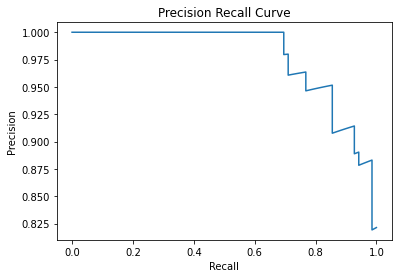

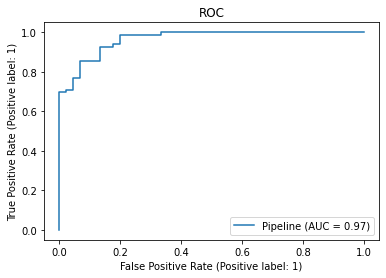

In [ ]:
...

## Multiple classes

With multiple classes we sometimes have to specify how they are calculated as for example with the F1 score. We can use different ways of averaging the score. 

From documentation:
`micro`: Calculate metrics globally by counting the total true positives, false negatives and false positives.

`macro`: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

`weighted`: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [ ]:
from sklearn.linear_model import LogisticRegression
data = datasets.load_iris()
X = data.data[:, :2]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456789)

linear = make_pipeline(StandardScaler(), LogisticRegression())
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)


from sklearn.metrics import accuracy_score, f1_score, classification_report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 score weighted: ", f1_score(y_test, y_pred, average='weighted'))
print("F1 score micro: ", f1_score(y_test, y_pred, average='micro'))
print("F1 score macro: ", f1_score(y_test, y_pred, average='macro'))
print("Report: ")
print(classification_report(y_test, y_pred))

Accuracy:  0.8
F1 score weighted:  0.8
F1 score micro:  0.8000000000000002
F1 score macro:  0.8461538461538461
Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.77      0.77      0.77        13
           2       0.77      0.77      0.77        13

    accuracy                           0.80        30
   macro avg       0.85      0.85      0.85        30
weighted avg       0.80      0.80      0.80        30



### Exercise - Confusion Matrix

From the results it is possible to calculate the confusion matrix. We can use `sklearn.metrics.confusion_matrix`. Or if we also want to diplay it we can use `sklearn.metrics.ConfusionMatrixDisplay`. Try to use these to show the confusion matrix.

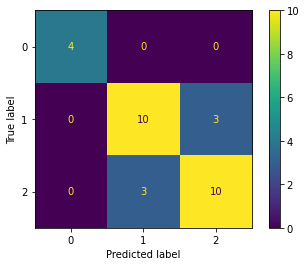

In [ ]:
...